In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan  

In [5]:
# Using one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Label encoding for binary columns like default, housing, loan, and the target variable y
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [6]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,1,0,0,0,0,1


In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [9]:
import numpy as np

def entropy(y):
    # Calculate the proportion of each class
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    # Compute entropy
    entropy = -np.sum([p * np.log2(p) for p in probabilities])
    return entropy


In [10]:
def gini_index(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    # Compute Gini
    gini = 1 - np.sum([p**2 for p in probabilities])
    return gini


In [11]:
def information_gain(parent, left_child, right_child):
    weight_left = len(left_child) / len(parent)
    weight_right = len(right_child) / len(parent)
    
    gain = entropy(parent) - (weight_left * entropy(left_child) + weight_right * entropy(right_child))
    return gain


In [12]:
def best_split(X, y):
    best_gain = 0
    best_feature, best_threshold = None, None
    
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_child = y[X[:, feature] <= threshold]
            right_child = y[X[:, feature] > threshold]
            
            if len(left_child) == 0 or len(right_child) == 0:
                continue
            
            gain = information_gain(y, left_child, right_child)
            
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold
    
    return best_feature, best_threshold


# Decision Tree Implementation

In [138]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Preprocessing the dataset
# Convert categorical features to numerical using one-hot encoding or label encoding

# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Label encode binary columns
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})  # Target variable

# Standardize numerical features
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Split the dataset into features (X) and target (y)
X = df.drop('y', axis=1).values
y = df['y'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Functions for Decision Tree from scratch
def entropy(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def gini_index(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum([p**2 for p in probabilities])

def information_gain(parent, left_child, right_child):
    weight_left = len(left_child) / len(parent)
    weight_right = len(right_child) / len(parent)
    gain = entropy(parent) - (weight_left * entropy(left_child) + weight_right * entropy(right_child))
    return gain

def best_split(X, y):
    best_gain = 0
    best_feature, best_threshold = None, None
    
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_child = y[X[:, feature] <= threshold]
            right_child = y[X[:, feature] > threshold]
            
            if len(left_child) == 0 or len(right_child) == 0:
                continue
            
            gain = information_gain(y, left_child, right_child)
            
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold
    
    return best_feature, best_threshold

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_labels, counts = np.unique(y, return_counts=True)
        
        # Stopping conditions
        if len(unique_labels) == 1 or n_samples < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            most_common_label = unique_labels[np.argmax(counts)]
            return most_common_label
        
        # Find the best split
        feature, threshold = best_split(X, y)
        if feature is None:
            most_common_label = unique_labels[np.argmax(counts)]
            return most_common_label
        
        # Split the dataset
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold
        
        # Handle edge case where one side of the split might be empty
        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            most_common_label = unique_labels[np.argmax(counts)]
            return most_common_label
        
        # Recursively build the left and right subtrees
        left_subtree = self.fit(X[left_indices], y[left_indices], depth+1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth+1)
        
        # Return the node structure
        return {"feature": feature, "threshold": threshold, "left": left_subtree, "right": right_subtree}
    
    def predict_sample(self, sample, tree):
        # Base case: if tree is a label, return it
        if not isinstance(tree, dict):
            return tree
        
        # Recursive case: traverse the tree based on the feature and threshold
        feature = tree["feature"]
        threshold = tree["threshold"]
        
        if sample[feature] <= threshold:
            return self.predict_sample(sample, tree["left"])
        else:
            return self.predict_sample(sample, tree["right"])
    
    def predict(self, X):
        return [self.predict_sample(sample, self.tree) for sample in X]


# Instantiate and train the decision tree
tree = DecisionTree(max_depth=5, min_samples_split=10)
tree.tree = tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree.predict(X_test)

# Evaluation Metrics
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    # print(true_positives, predicted_positives)
    return true_positives / predicted_positives

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    # print(actual_positives, true_positives)
    return true_positives / actual_positives

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec)

# Calculate performance metrics
y_pred = np.array(y_pred)
y_test = np.array(y_test)
print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision(y_test, y_pred))
print("Recall:", recall(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8948357845847617
Precision: 0.6330798479087453
Recall: 0.30522456461961506
F1 Score: 0.41187384044526903


# Feature Selection and Feature Importance

In [110]:
DF = pd.read_excel('Train.xlsx')

In [113]:
# Chi Square Test for Categorical Variables (Feature Selection)
from scipy.stats import chi2_contingency

def chi_square_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table
    )
    return p

# Perform chi-square test for all categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
target = 'y'
chi2_results = {}
for feature in categorical_features:
    p = chi_square_test(DF, feature, target)
    chi2_results[feature] = p

# Select features with p-value less than 0.05
selected_features = [k for k, v in chi2_results.items() if v < 0.05]
print("Selected Features:", selected_features)



Selected Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [116]:
#ANOVA Test for Numerical Variables (Feature Selection)
from scipy.stats import f_oneway

def anova_test(df, feature, target):
    groups = [df[df[target] == value][feature] for value in df[target].unique()]
    f, p = f_oneway(*groups)
    return p

# Perform ANOVA test for all numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
target = 'y'
anova_results = {}
for feature in numerical_features:
    p = anova_test(DF, feature, target)
    anova_results[feature] = p

# Select features with p-value less than 0.05
selected_features = [k for k, v in anova_results.items() if v < 0.05]
print("Selected Features:", selected_features)

Selected Features: ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']


In [117]:
anova_results

{'age': 8.825643691900577e-08,
 'balance': 2.5211136918594683e-29,
 'duration': 0.0,
 'campaign': 1.0123473642068786e-54,
 'pdays': 3.79055331945749e-108,
 'previous': 7.801830349772385e-88,
 'day': 1.6538801608077923e-09}

                feature  importance
6              duration    0.274977
2               balance    0.100906
0                   age    0.099861
5                   day    0.086811
40     poutcome_success    0.053275
8                 pdays    0.042150
7              campaign    0.039097
9              previous    0.021703
3               housing    0.021448
27      contact_unknown    0.014095
23  education_secondary    0.013018
34            month_mar    0.012518
21      marital_married    0.011767
24   education_tertiary    0.011527
18       job_technician    0.011166
13       job_management    0.010760
37            month_oct    0.010640
33            month_jun    0.010638
28            month_aug    0.010493
22       marital_single    0.010256
35            month_may    0.010121
32            month_jul    0.009860
4                  loan    0.009672
10      job_blue-collar    0.008749
36            month_nov    0.008673
30            month_feb    0.008349
38            month_sep    0

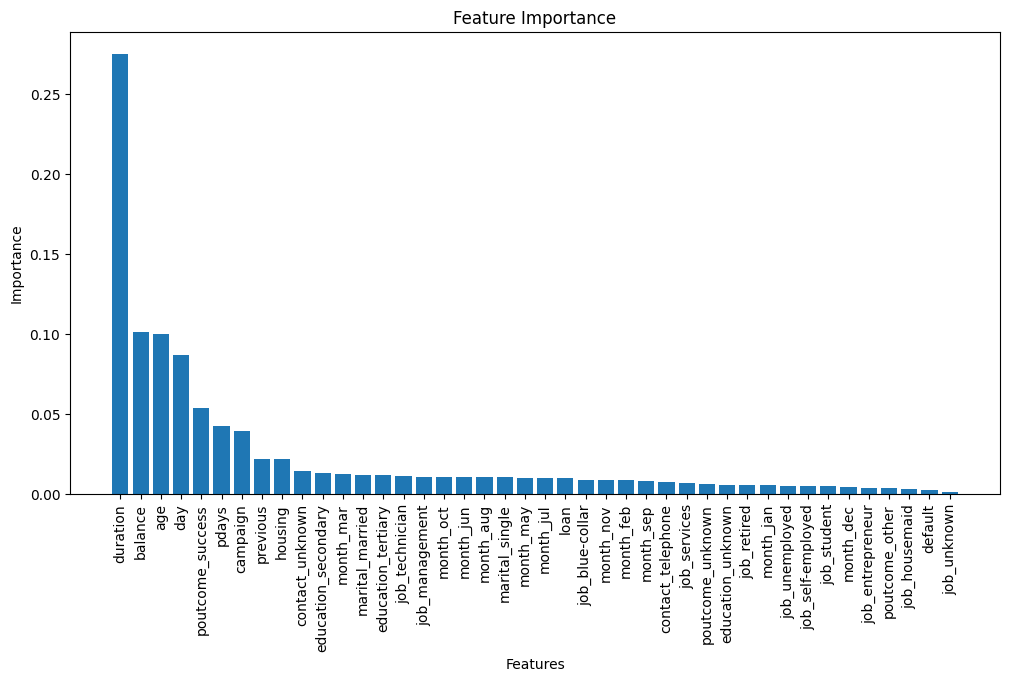

In [118]:
# Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Preprocessing the dataset
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Label encode binary columns
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Split the dataset into features (X) and target (y)

X = df.drop('y', axis=1).values
y = df['y'].values

# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_df = pd.DataFrame({"feature": df.drop('y', axis=1).columns, "importance": feature_importances})
feature_df = feature_df.sort_values("importance", ascending=False)
print(feature_df)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(feature_df['feature'], feature_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [121]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Preprocessing the dataset
# Scale numerical features
scaler = StandardScaler()
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Label encode binary columns
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Split the dataset into features (X) and target (y)
X = df.drop('y', axis=1).values
y = df['y'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = df.drop('y', axis=1).columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['contact_unknown', 'month_mar', 'month_oct', 'month_sep',
       'poutcome_success'],
      dtype='object')


# Decision Tree with Post Pruning

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives != 0 else 0

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives if actual_positives != 0 else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0
# Load the dataset
df = pd.read_excel('Train.xlsx')

# Preprocessing the dataset
# Convert categorical features to numerical using one-hot encoding or label encoding

# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Label encode binary columns
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})  # Target variable

# Standardize numerical features
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Split the dataset into features (X) and target (y)
X = df.drop('y', axis=1).values
y = df['y'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets for pruning
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Functions for Decision Tree from scratch
def entropy(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def gini_index(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum([p**2 for p in probabilities])

def information_gain(parent, left_child, right_child):
    weight_left = len(left_child) / len(parent)
    weight_right = len(right_child) / len(parent)
    gain = entropy(parent) - (weight_left * entropy(left_child) + weight_right * entropy(right_child))
    return gain

def best_split(X, y):
    best_gain = 0
    best_feature, best_threshold = None, None
    
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_child = y[X[:, feature] <= threshold]
            right_child = y[X[:, feature] > threshold]
            
            if len(left_child) == 0 or len(right_child) == 0:
                continue
            
            gain = information_gain(y, left_child, right_child)
            
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold
    
    return best_feature, best_threshold

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_labels, counts = np.unique(y, return_counts=True)
        
        # Stopping conditions
        if len(unique_labels) == 1 or n_samples < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return unique_labels[np.argmax(counts)]
        
        # Find the best split
        feature, threshold = best_split(X, y)
        if feature is None:
            return unique_labels[np.argmax(counts)]
        
        # Split the dataset
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold
        
        # Recursively build the left and right subtrees
        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)
        
        return {"feature": feature, "threshold": threshold, "left": left_subtree, "right": right_subtree}
    
    def prune(self, tree, X_val, y_val):
        if not isinstance(tree, dict):
            return tree
        
        # Recursively prune left and right subtrees
        tree["left"] = self.prune(tree["left"], X_val, y_val)
        tree["right"] = self.prune(tree["right"], X_val, y_val)
        
        # Check if we can prune this node
        original_prediction = self.predict(X_val)
        original_accuracy = accuracy(y_val, original_prediction)
        
        # Replace current node with majority class
        majority_class = np.argmax(np.bincount(y_val))
        tree_label = majority_class
        
        # Calculate accuracy if we replace the subtree with the majority class
        tree_accuracy = accuracy(y_val, np.full(y_val.shape, tree_label))
        
        # Prune if it does not decrease accuracy
        if tree_accuracy >= original_accuracy:
            return tree_label
        
        return tree
    
    def fit_with_pruning(self, X_train, y_train, X_val, y_val):
        self.tree = self.fit(X_train, y_train)
        self.tree = self.prune(self.tree, X_val, y_val)
    
    def predict_sample(self, sample, tree):
        # Base case: if tree is a label, return it
        if not isinstance(tree, dict):
            return tree
        
        # Recursive case: traverse the tree based on the feature and threshold
        feature = tree["feature"]
        threshold = tree["threshold"]
        
        if sample[feature] <= threshold:
            return self.predict_sample(sample, tree["left"])
        else:
            return self.predict_sample(sample, tree["right"])
    
    def predict(self, X):
        return [self.predict_sample(sample, self.tree) for sample in X]

# Example usage
# Split the dataset into features (X) and target (y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Instantiate and train the decision tree with pruning
tree = DecisionTree(max_depth=5, min_samples_split=10)
tree.fit_with_pruning(X_train, y_train, X_val, y_val)

# Predicting on the test set
y_pred = tree.predict(X_test)

# Calculate performance metrics
y_pred = np.array(y_pred)
y_test = np.array(y_test)
print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision(y_test, y_pred))
print("Recall:", recall(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8970474400088466
Precision: 0.6337792642140468
Recall: 0.3473877176901925
F1 Score: 0.4487862640615749


# Running the Pruned Tree on the Test Data

##### The reults are stored in 'Test_with_predictions.xlsx' under the 'predicted_y' column and take value 1 for yes and 0 for no 

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the original test dataset
original_test_df = pd.read_excel('Test.xlsx')

# Preprocessing the new dataset for prediction
# Convert categorical features to numerical using one-hot encoding or label encoding

# One-hot encode the categorical columns
test_df = pd.get_dummies(original_test_df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Label encode binary columns
test_df['default'] = test_df['default'].map({'yes': 1, 'no': 0})
test_df['housing'] = test_df['housing'].map({'yes': 1, 'no': 0})
test_df['loan'] = test_df['loan'].map({'yes': 1, 'no': 0})

# Standardize numerical features
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
scaler = StandardScaler()
test_df[numeric_cols] = scaler.fit_transform(test_df[numeric_cols])

# Split the dataset into features (X)
X_test_new = test_df.values

# Predicting on the new test set
y_pred_new = tree.predict(X_test_new)

# Add the predictions to the original DataFrame
original_test_df['predicted_y'] = y_pred_new

# Save the DataFrame to the Excel file
original_test_df.to_excel('Test_with_predictions.xlsx', index=False)

print("Predictions have been written to Test_with_predictions.xlsx")

Predictions have been written to Test_with_predictions.xlsx


In [11]:
original_test_df['predicted_y'].value_counts()

0    4398
1     123
Name: predicted_y, dtype: int64